# Write a script that implement the GD algorithm, with the following structure:
Input:
    f: the function f(x) we want to optimize.
    It is supposed to be a Python function, not an array.
    grad_f: the gradient of f(x). It is supposed to be a Python function, not an array.
    x0: an n-dimensional array which represents the initial iterate.
    kmax: an integer. The maximum possible number of iterations (to avoid infinite loops)
    tolf: small float. The relative tollerance of the algorithm.
    Convergence happens if ||grad_f(x_k)||_2 < tolf ||grad_f(x_0)||_2
    tolx: small float. The tollerance in the input domain.
    Convergence happens if ||x_{k} - x_{k-1}||_2 < tolx.
    Pay attention to the first iterate.
    Output:
    x: an array that contains the value of x_k FOR EACH iterate x_k (not only the latter).
    k: an integer. The number of iteration needed to converge. k < kmax.
    f_val: an array that contains the value of f(x_k) FOR EACH iterate x_k.
    grads: an array that contains the value of grad_f(x_k) FOR EACH iterate x_k.
    err: an array the contains the value of ||grad_f(x_k)||_2 FOR EACH iterate x_k.

In [30]:
import matplotlib.pyplot as plt
import numpy
import numpy as np

In [31]:
def plot(x, err, x_true, back=False):
    k = len(x)
    plt.title(f"x*={x_true}, x_c={np.round(x[-1], 2)} N. of iteration: {k}, backtracking: {'yes' if back else 'no'}")
    plt.plot(err)
    #plt.subplot(2, 2, 2)
    #plt.plot(points, grads)
    #plt.subplot(2, 2, 3)
    #plt.plot(points, err)

    plt.show()





def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.

    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha

        if alpha < 1e-3:
            break
    return alpha



def GD(f, grad_f, x0, tolf, tolx, kmax, alpha=0.2,back=False):

    x0 = np.array(x0)
    # output
    x = np.zeros(kmax, dtype=list)
    f_val = np.zeros(kmax, dtype=list)
    grads = np.zeros(kmax, dtype=list)
    err = np.zeros(kmax, dtype=list)

    x_tol = tolx
    f_tol = tolf
    x_old = x0
    k = 0

    while k < kmax and x_tol >= tolx and f_tol >= tolf:
        if back:
            alpha = backtracking(f, grad_f, x_old)
        x_k = x_old - alpha * np.array(grad_f(x_old))
        x_tol = np.linalg.norm(x_k-x_old)
        f_tol = np.linalg.norm(f(x_k))

        # Update arrays
        x[k] = x_k
        f_val[k] = f(x_k)
        grads[k] = grad_f(x_k)
        err[k] = np.linalg.norm(grads[k])
        x_old = x_k
        k = k+1

    return x[:k], f_val[:k], grads[:k], err[:k]



## Test the algorithm above on the following functions:

In [32]:
tolf = 1e-4
tolx = 1e-4
kmax = 100
alphas = [0.5, 0.2, 0.001, 0.0001]

### Function 1
 $$f(x_1, x_2) = (x_1-3)^2 + (x_2-1)^2$$
for which the true optimum is $x^* = (3,1)^T$

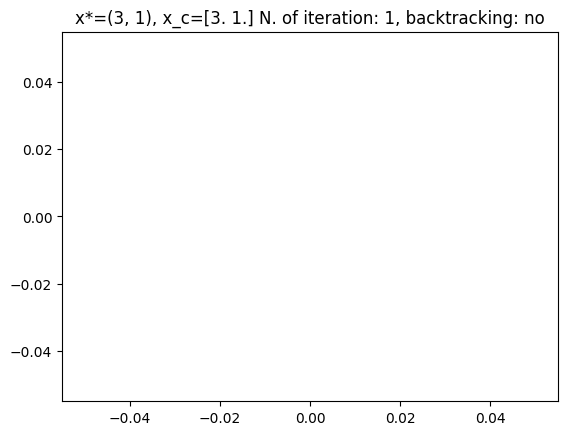

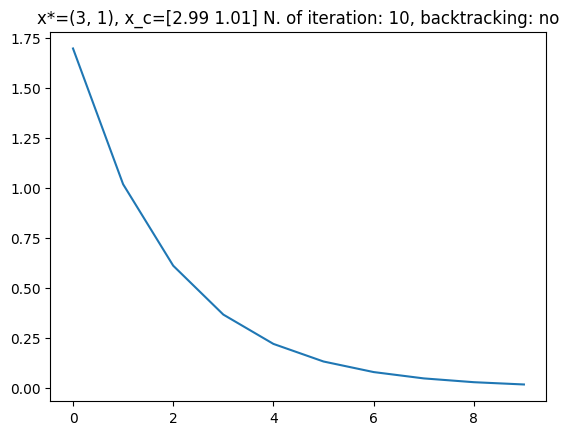

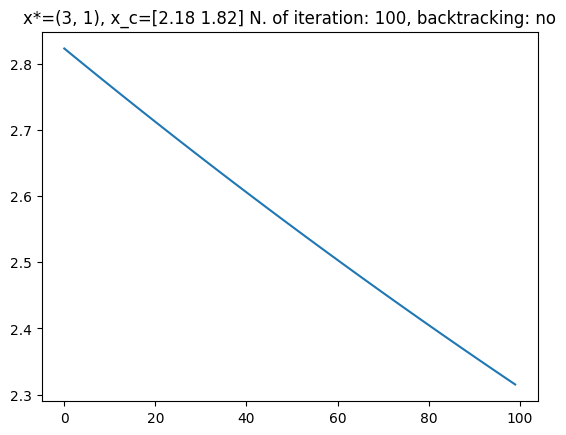

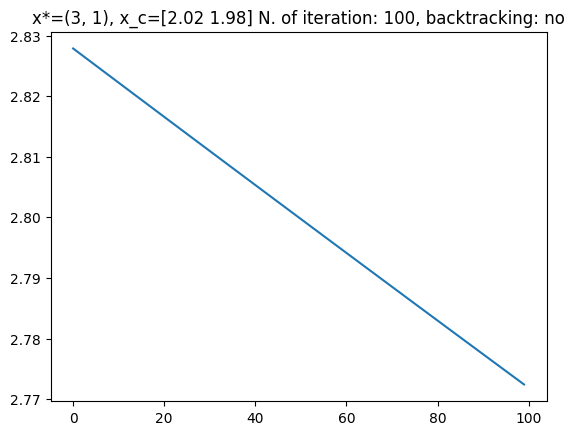

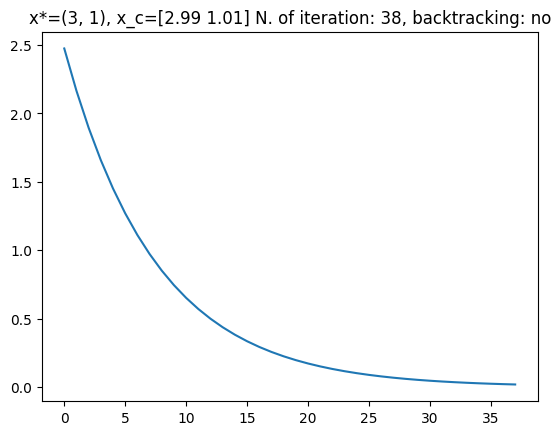

In [33]:
def f1(x):
    x1, x2 = x
    return (x1 - 3)**2 + (x2 - 1)**2
def grad_f1(x):
    x1, x2 = x
    return np.array((2*(x1-3), 2*(x2-1)))


x0 = (2, 2)
x_true = (3,1)

def test_function(f1, grad_f1, x0, x_true, kmax):
    for alpha in alphas:
        x1, f_val1, grads1, err1 = GD(f1, grad_f1, x0, tolf, tolx, kmax, alpha)
        plot(x1, err1, x_true)
    x1, f_val1, grads1, err1 = GD(f1, grad_f1, x0, tolf, tolx, kmax, back=True)
    plot(x1, err1, x_true)

test_function(f1, grad_f1, x0, x_true, kmax)

## Function 2
$$f(x_1, x_2) = 10 (x_1-1)^2 + (x_2 - 2)^2$$

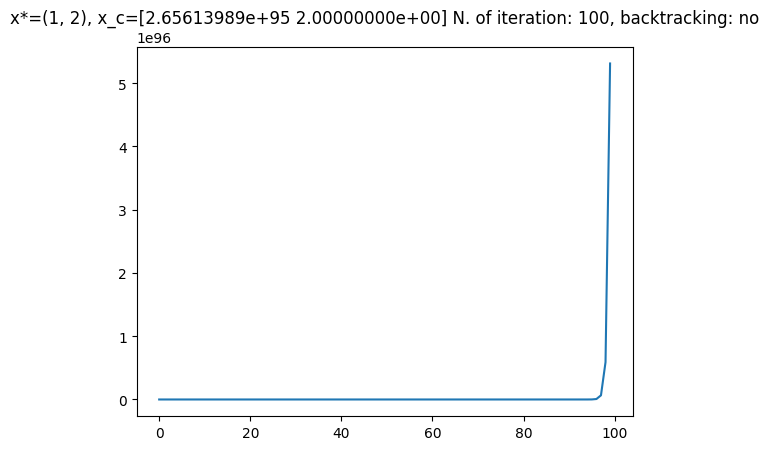

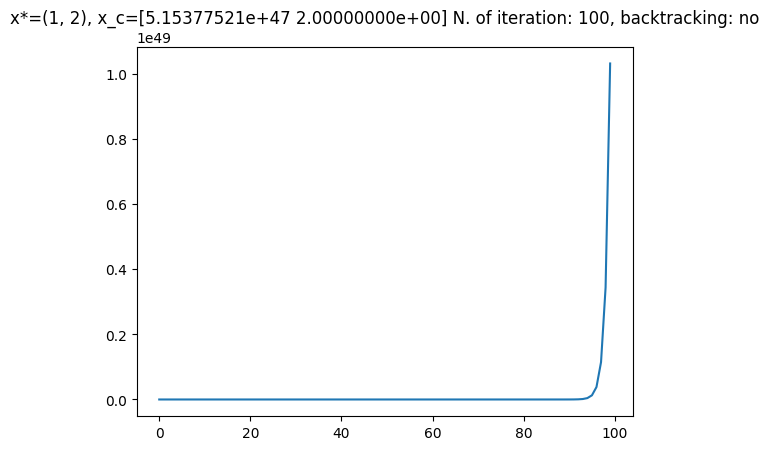

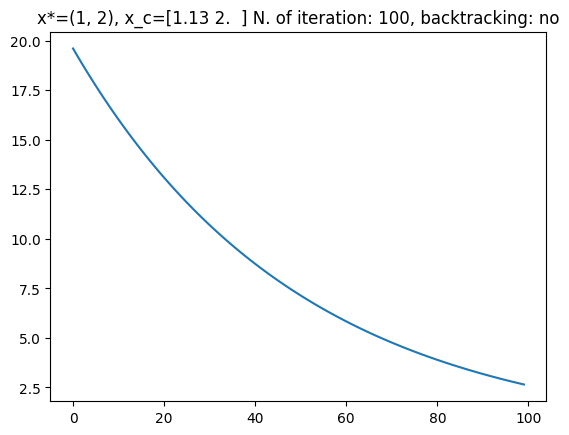

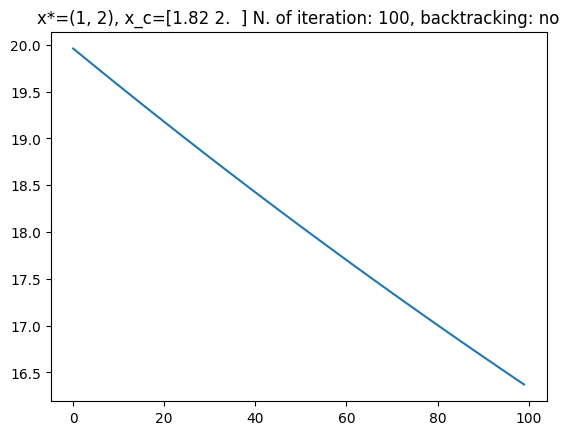

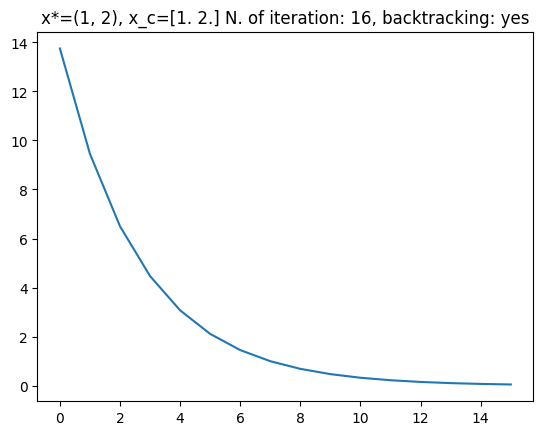

In [35]:
def f2(x):
    x1, x2 = x
    return 10*(x1 - 1)**2 + (x2 - 2)**2
def grad_f2(x):
    x1, x2 = x
    return np.array((20*(x1-1), 2*(x2-2)))


x0 = (2, 2)
x_true = (1,2)

test_function(f2, grad_f2, x0, x_true, kmax)

## Function 3
$$f(x) = \frac{1}{2}||Ax-b||^2_2 + \frac{\lambda}{2}||x||^2_2 $$

In [38]:
def f3(x):
    n, m = x.shape
    x_true = np.ones((1, n))
    v = np.linspace(0, 1, n, endpoint=True)
    A = numpy.vander(v)
    b = A @ x_true
    return 1/2 * np.linalg.norm(A @ x - b, 2)**2
def grad_f3(x):
    x1, x2 = x
    return np.array((2*(x1-3), 2*(x2-1)))


N = np.arange(5, 20, 5)

for n in N:
    x0 = np.ones((n, 1))
    x_true = x0
    test_function(f1, grad_f1, x0, x_true, kmax)

ValueError: too many values to unpack (expected 2)